<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad_Semana6_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y analítica de datos**
## Actividad 6
### Visualizacion

#### Profesor: Jobish Vallikavungal Devassia
#### Profesor Tutor: Roberto Antonio Guevara González

#### Bernardo Mijangos Flores
#### Matricula A01793654

In [62]:
#importamos la librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler   # para escalar 
from sklearn.decomposition import PCA    # funcion de PCA

# Punto 1

Descarga los datos enlace a un sitio externo. y carga el dataset en tu libreta

In [2]:
# obtenemos el path para la lectura de los datos
mypath = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

# generamos un dataframe con los datos obtenidos de mypath
df = pd.read_csv(mypath, sep=",")
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


## Información de los datos

Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles.

## Información de atributos:

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

* X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
* X2: Género (1 = masculino; 2 = femenino).
* X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
* X5: Edad (año).
* X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:
  * X6 = el estado de pago en septiembre de 2005;
  * X7 = el estado de pago en agosto de 2005; . . .;
  * X11 = estado de amortización en abril de 2005.

La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

* X12-X17: Importe del estado de cuenta (dólar NT).
  * X12 = monto del estado de cuenta en septiembre de 2005;
  * X13 = monto del estado de cuenta en agosto de 2005; . . .;
  * X17 = monto del estado de cuenta en abril de 2005.
* X18-X23: Monto del pago anterior (dólar NT).
  * X18 = monto pagado en septiembre de 2005;
  * X19 = monto pagado en agosto de 2005; . . .;
  * X23 = monto pagado en abril de 2005.


Yeh, I. C. y Lien, C. H. (2009).


# Punto 2

Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
# obtenemos el total de lineas y columnas del dataframe

print(df.shape)

(30000, 25)


In [4]:
# mostramos las etiquetas de las columnas

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
# mostramos los primeros 7 registros del dataframe

df.head(7)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0


In [6]:
# mostramos el tipo de dato de cada columna

df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [36]:
var_category = ['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
for i in var_category:
    df[i] = df[i].astype('category')
df.dtypes

ID     category
X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

In [21]:
# mostramos informacion mas completa del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      30000 non-null  category
 1   X1      30000 non-null  int64   
 2   X2      29999 non-null  category
 3   X3      29998 non-null  category
 4   X4      29998 non-null  category
 5   X5      29995 non-null  float64 
 6   X6      29997 non-null  category
 7   X7      29995 non-null  category
 8   X8      29993 non-null  category
 9   X9      29991 non-null  category
 10  X10     29984 non-null  category
 11  X11     29986 non-null  category
 12  X12     29989 non-null  float64 
 13  X13     29989 non-null  float64 
 14  X14     29987 non-null  float64 
 15  X15     29985 non-null  float64 
 16  X16     29983 non-null  float64 
 17  X17     29990 non-null  float64 
 18  X18     29992 non-null  float64 
 19  X19     29991 non-null  float64 
 20  X20     29992 non-null  float64 
 21  X21     2998

In [22]:
# obtenemos el total de valores nulos por cada columna

df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

se observa que en la mayoria de las columnas faltan datos sobre todo desde la columna X10 al X22, por lo que realizaremos una copia del dataframe y trabajaremos con dicha copia.

# Punto 3

Limpia los datos eliminando los registros nulos o rellena con la media de la columna


In [23]:
# realizamos una copia para trabajar en ella

dfn = df.copy()
dfn

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [24]:
# procedemos a eliminar los nan y revisaremos cuanto registros se pierden de los 30,000 iniciales
dfn.dropna(inplace = True)

# verificamos si aun existen valores nulos
dfn.isna().values.any()

False

In [41]:
# corroboramos con las columnas

dfn.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [42]:
# mostramos la copia del dataframe depurada

dfn.shape

(29958, 25)

se observa un total de 42 registros eliminados de los 30,000 iniciales lo que representa el .14% de los datos.  Se puede considerar el uso de la media o mediana para reemplazar los valores nulos pero considero que el .14% no es representativo para los datos y se puede trabajar sin ellos

# Punto 4

Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [27]:
# obtenemos la estadistica de X1 y X2

dfn[['X1','X5']].describe()

,X1,X5
count,29958.000000,29958.000000
mean,167555.900928,35.483443
std,129737.299088,9.214319
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


Se obtiene la estadistica de las variables X1 y X5 (Monto del crédito otorgado (dólar NT) y Edad) dado que las demas variables X2, X3 y X4 son de clasificación (Género, Educacion, Estado Civil)

X1 (Monto del crédito otorgado) tiene una media de 167555.9 el 50% de los datos se encuentra entre los montos de 50000 y 240000 y su mediana es de 140000 de un total de 29958 registros el valor minimo es de 10000 y el maximo es de 1000000

X2 (Edad) tiene una media de 35.48, el 50% de los datos se encuentra entre los 28 y 41 su mediana es de 34 de un total de 29958 registros, la edad minima es de 21 y la maxima 79




In [28]:
# obtenemos la estadistica de X12 a X17

dfn[['X12','X13','X14','X15','X16','X17']].describe()

,X12,X13,X14,X15,X16,X17
count,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000
mean,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763
std,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000
50%,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000
75%,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Revisando la estadistica de X12 a X17 (Importe del estado de cuenta (dólar NT) de los meses de abril a septiembre como se describe se puede observar que la media se encuentra entre los 51248 en X12 y 38889 en X17 asi como la mediana se encuentra en 22379 en X12 y 17067 en X17, dando a entende que hubo un incremento de abril a septiembre

In [29]:
# obtenemos la estadistica de X18 a X23

dfn[['X18','X19','X20','X21','X22','X23']].describe()

,X18,X19,X20,X21,X22,X23
count,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Con los datos de X18 a X23 (Monto del pago anterior) se observa una media de 5664 en X18 y 5220 en X23 asi mismo la mediana es de 2100 en X18 y 1500 en X23 lo que demuestra el incremento de pagos en los meses de abril a septiembre asi el valor maximo es de 873552 en X18 y 528666 en X23

# Punto 5

Realiza el conteo de las variables categóricas

In [31]:
# mostramos el conteo de las variables categoricas

print( pd.value_counts(dfn['X2']) )
print(100 * pd.value_counts(dfn['X2'])/dfn['X2'].count())


2.0    18095
1.0    11863
Name: X2, dtype: int64
2.0    60.401228
1.0    39.598772
Name: X2, dtype: float64


In [32]:
# mostramos el conteo de las variables categoricas

print( pd.value_counts(dfn['X3']) )
print(100 * pd.value_counts(dfn['X3'])/dfn['X3'].count())


2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
2.0    46.762134
1.0    35.289405
3.0    16.386274
5.0     0.934642
4.0     0.410575
6.0     0.170238
0.0     0.046732
Name: X3, dtype: float64


In [34]:
# mostramos el conteo de las variables categoricas

print( pd.value_counts(dfn['X4']) )
print(100 * pd.value_counts(dfn['X4'])/dfn['X4'].count())


2.0    15939
1.0    13643
3.0      322
0.0       54
Name: X4, dtype: int64
2.0    53.204486
1.0    45.540423
3.0     1.074838
0.0     0.180252
Name: X4, dtype: float64


X2: Género (1 = masculino; 2 = femenino).
X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).

# Punto 6

Escala los datos, si consideras necesario


In [78]:
# Escalando los datos numericos

scaler = StandardScaler()

var_numeric = [c for c in df.columns.values.tolist()if c not in var_category]
print(var_numeric)
df2 = pd.DataFrame(scaler.fit_transform(dfn[var_numeric]), columns=var_numeric)
df2.head()

# Z-score the features
#scaler = StandardScaler()   # proceso
#scaler.fit(var_numeric)               
#X = scaler.transform(var_numeric)     


['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


# Punto 7

Reduce las dimensiones con PCA, si consideras necesario.

1.   Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
2.   Indica la importancia de las variables en cada componente

In [81]:
# modelo de PCA

pca = PCA(n_components=5) # estimacion con 5 componentes
components = pca.fit_transform(df2)
components.shape

(29958, 5)

In [82]:
print(pca.explained_variance_ratio_)

[0.42277891 0.12255241 0.07464279 0.06608386 0.06312384]


### 8 Elabora los histogramas de los atributos para visualizar su distribución

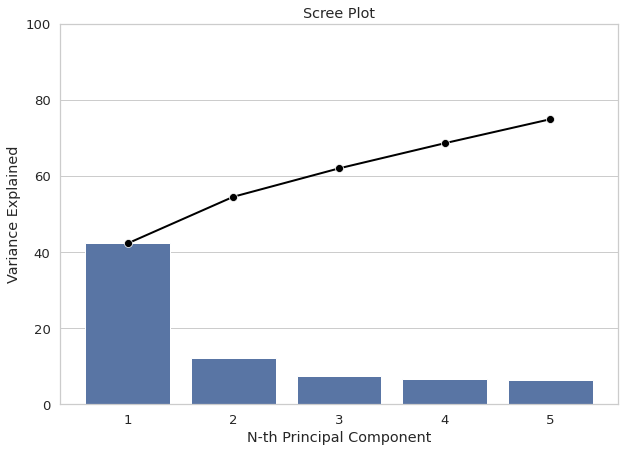

In [84]:
PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

In [64]:
PC_columns = [f'PC{i}' for i in np.arange(pcs.n_components_) + 1]

In [65]:
# df with feature importance
data = pd.DataFrame(pcs.components_, columns=PC_columns, index = df2.columns)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.032789,0.372446,0.383253,0.388264,0.391557,0.388505,0.380672,0.135120,0.116768,0.128056,0.116903,0.113741,0.105481
X5,0.300709,0.071906,-0.190793,-0.174644,-0.126883,-0.120403,-0.105928,-0.094157,0.383194,0.408391,0.392339,0.349613,0.303923,0.323529
X12,-0.378575,-0.869471,-0.034207,-0.001814,0.034747,0.034073,0.033882,0.018489,0.173845,0.200925,0.122065,0.062272,-0.060900,-0.050896
X13,-0.200103,0.338990,-0.063899,0.007629,0.060528,0.074774,0.039553,-0.070616,0.362055,0.345745,0.244688,-0.094736,-0.609833,-0.365692
X14,0.035312,-0.039760,0.041391,0.083164,0.113790,0.028378,-0.106756,-0.164986,0.225652,0.148714,-0.239600,-0.577791,-0.193395,0.659155
X15,-0.078883,0.071461,-0.043987,-0.028824,0.099239,0.014527,-0.099290,0.069272,0.040574,0.408361,-0.108158,-0.500809,0.602388,-0.409151
X16,0.111239,-0.078816,0.008169,-0.032444,-0.121162,0.126494,-0.007584,0.007892,-0.201646,-0.278835,0.785216,-0.462241,0.014301,0.025459
X17,-0.046381,0.027368,0.009341,-0.135636,0.093077,0.039157,0.049781,-0.000282,-0.748694,0.578491,0.068216,0.077764,-0.164877,0.181276
X18,-0.821996,0.330346,0.010348,0.016872,-0.018607,0.019109,0.023701,0.058701,0.019949,-0.110712,0.152990,0.098813,0.252920,0.316686
X19,-0.029201,-0.009011,0.566716,0.386872,0.122863,-0.205260,-0.419992,-0.488861,-0.056581,0.050854,0.144908,0.124098,0.060003,-0.099178


In [66]:
data.iloc[:,:4].abs().idxmax() # Variables con mayor importancia en cada componente

PC1    X18
PC2    X12
PC3    X19
PC4    X23
dtype: object

In [67]:
data.iloc[:,:4].abs().idxmin() # Variables con menor importancia en cada componente

PC1    X22
PC2    X22
PC3    X16
PC4    X12
dtype: object

### 9 Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

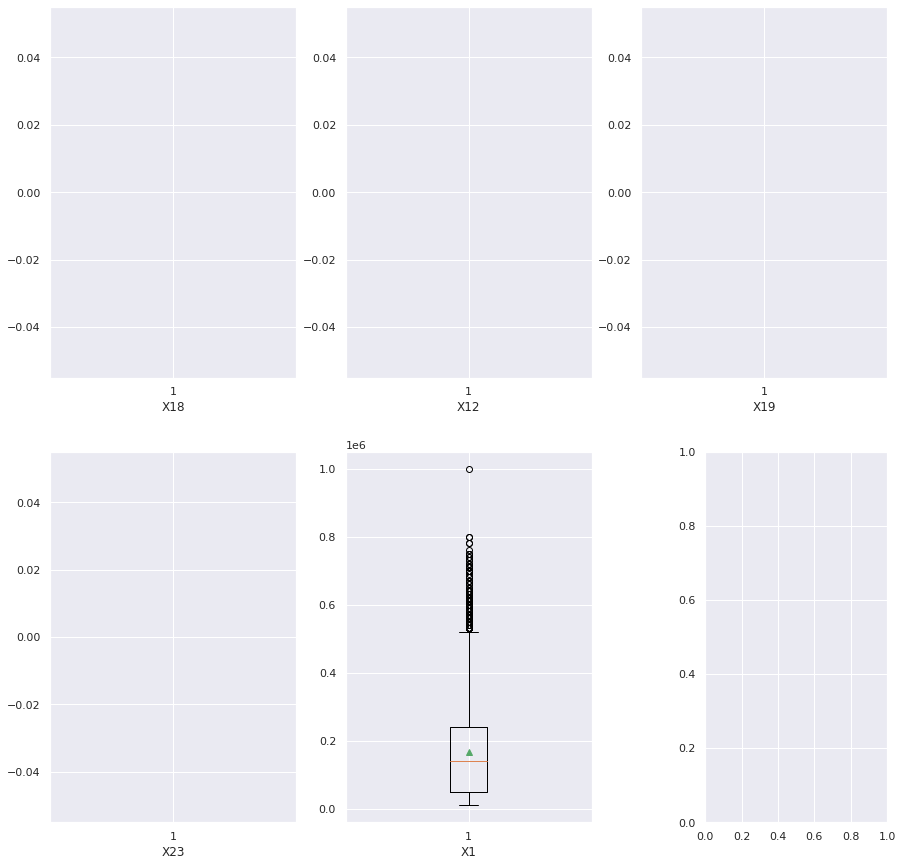

In [68]:
sns.set(rc={'figure.figsize':(15,15)})
cols = ['X18','X12', 'X19', 'X23', 'X1']
fig, axes = plt.subplots(2, 4)
k = 0
for col in cols:
  plt.subplot(2,3,k+1) 
  plt.boxplot(df[col], showmeans=True)
  plt.xlabel(col)
  k+=1

plt.show()

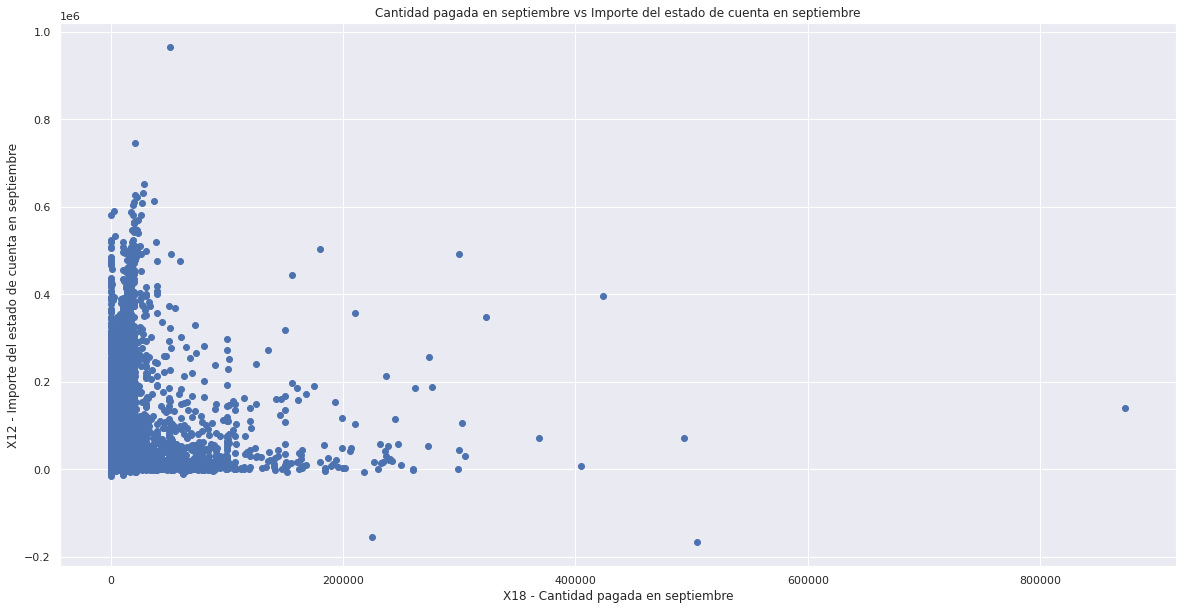

In [69]:
sns.set(rc={'figure.figsize':(20, 10)})
plt.scatter( df['X18'], df['X12'])
plt.title("Cantidad pagada en septiembre vs Importe del estado de cuenta en septiembre")
plt.xlabel('X18 - Cantidad pagada en septiembre')
plt.ylabel('X12 - Importe del estado de cuenta en septiembre')
plt.show()

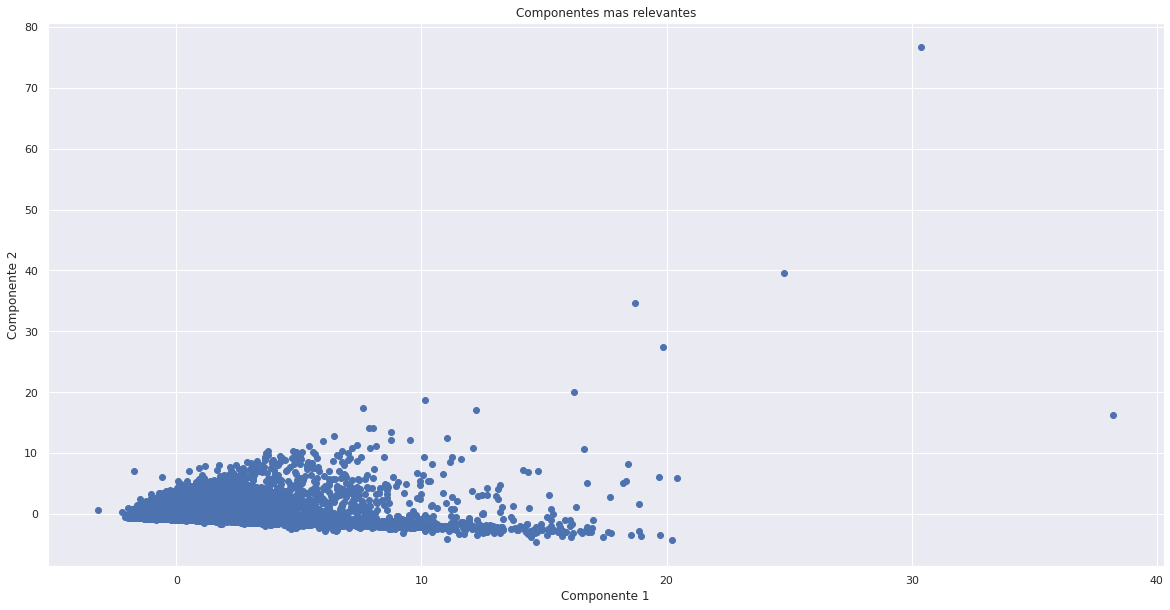

In [70]:
sns.set(rc={'figure.figsize':(20, 10)})
plt.scatter( components[:, 0], components[:, 1])
plt.title("Componentes mas relevantes")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

### 10 Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Se puede ver que en el gráfico de los boxplot la mayoría de los datos se presentan como outliers ya que en la mayoría de las variables las cantidades de pago se representan en la escala de decenas de miles y gran parte de la distribución de los datos (cuartiles del 25 al 75%) se encuentran por debajo de 10k

En el caso del segundo gráfico se utilizó el scatter plot para ver si existía una dependencia lineal entre los datos de las variables X12 y X18 ya que estas fueron las mas relevantes para las componentes 1 y 2 de PCA, sin embargo se puede observar que PCA encuentra relevancia incluso cuando no hay una dependencia lineal entre las variables.

Para el último scatterplot se utilizaron las componentes 1 y 2 para ver si existía un patrón lineal entre ellas, sin embargo, es muy baja y para poder determinar el comportamineto de los datos se tiene que utilizar mas componentes para mantener la integridad de los datos.